# Final Project Submission

Please fill out:
* Student name: alex beat
* Student pace: self paced / part time / full time: part time
* Scheduled project review date/time: na
* Instructor name: James Irving
* Blog post URL: https://medium.com/@jonathonalexander/software-engineer-or-data-scientist-3493360685d8
* Video of 5-min Non-Technical Presentation: na


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___


## PROCESS CHECKLIST


1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

The purpose of this project is to clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 



# OBTAIN

In [258]:
# OBTAIN

# Import data, inspect, check for datatypes to convert and null values
# Display header and info.
# Drop any unneeded columns, if known (df.drop(['col1','col2'],axis=1,inplace=True)

In [259]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Requirement already up-to-date: fsds_100719 in /anaconda3/envs/learn-env/lib/python3.6/site-packages (0.4.45)


In [260]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

## Import data, inspect, display header and info.

In [261]:
pd.set_option('display.max_columns',0)

In [262]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Check for repeat rows

In [263]:
#check for repeat rows
df['id'].value_counts()


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [264]:
# drop repeat rows based on 'id'
df.drop_duplicates(subset='id', inplace=True)
df['id'].value_counts()

2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
             ..
2115510470    1
2922701305    1
6071600370    1
526059224     1
1777500160    1
Name: id, Length: 21420, dtype: int64

## Check for null vals

In [265]:
# check for null values and how many
display(df.isna().any())
display(df.isna().sum())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fix waterfront nulls

In [266]:
#waterfront with null value
df.loc[df['waterfront'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,3,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,3,9,2570,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669
55,9822700295,5/12/2014,885000.0,4,2.50,2830,5000,2.0,NaN,0.0,3,9,2830,0.0,1995,0.0,98105,47.6597,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,3,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,3,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,3,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,3,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [267]:
# fix waterfront nulls by making nulls into 0.0 for nonwaterfront
df['waterfront'].fillna(0.0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fix view nulls

In [268]:
# number of value counts of 'view'. There's 63 null vals in 'view', time to fill them in as 0
df['view'].value_counts()

0.0    19253
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64

In [269]:
df['view'].fillna(0.0, inplace=True)
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fix yr_renovated nulls

In [270]:
#looking for nulls in yr renovated, seeing that median looks strange
df['yr_renovated'].describe()

count    17616.000000
mean        83.847241
std        400.436625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [271]:
df.loc[df['yr_renovated'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,1430,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,0.0,0.0,3,7,1070,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,3,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,3,7,790,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,4/16/2015,475000.0,3,2.25,1190,1200,3.0,0.0,0.0,3,8,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
21577,8672200110,3/17/2015,1090000.0,5,3.75,4170,8142,2.0,0.0,2.0,3,10,4170,0.0,2006,NaN,98056,47.5354,-122.181,3030,7980
21579,1972201967,10/31/2014,520000.0,2,2.25,1530,981,3.0,0.0,0.0,3,8,1480,50.0,2006,NaN,98103,47.6533,-122.346,1530,1282
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,3,10,3410,?,2007,NaN,98040,47.5653,-122.223,2290,10125


In [272]:
# there are loads of 0 vals in yr renovated in addition to the nulls
df['yr_renovated'].value_counts()

0.0       16876
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [273]:
# fill na vals with 0 because there's a large amount already showing 0, just to get rid of na vals
df['yr_renovated'].fillna(0.0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Check for datatypes to convert

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [275]:
# there's a boatload of ?s as objects in this column
df['sqft_basement'].value_counts()

0.0       12717
?           452
600.0       216
500.0       206
700.0       205
          ...  
2610.0        1
2390.0        1
768.0         1
3480.0        1
266.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [276]:
df.loc[df['sqft_basement'] == '?']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,3,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,3,7,2330,?,2013,0.0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0.0,0.0,3,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,3,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [277]:
#in order to simplify the prob of ?s in sqft basement, along with it being in object dtype, drop column completely. 
df.drop('sqft_basement', axis=1, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


In [278]:
# then create entire new column, based on sqft basement being the difference of sqft living and sqft above
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [279]:
# sqft basement is a new column containing ints
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
sqft_basement    21420 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.6+ MB


In [280]:
# move sqft basement column back to original position
df = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [281]:
# Recast data types, identify outliers, check for multicollinearity, normalize data**
# Check and cast data types

#  Check for #'s that are store as objects (df.info(),df.describe())
# when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
# Decide how to deal weird/null values (df.unique(), df.isna().sum())
# df.fillna(subset=['col_with_nulls'],'fill_value'), df.replace()
#  Check for categorical variables stored as integers.
# May be easier to tell when you make a scatter plotm or pd.plotting.scatter_matrix()
# Check for missing values (df.isna().sum())

# Can drop rows or colums
# For missing numeric data with median or bin/convert to categorical
# For missing categorical data: make NaN own category OR replace with most common category
#  Check for multicollinearity
# Use seaborn to make correlation matrix plot
# Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
#  Normalize data (may want to do after some exploring)
# Most popular is Z-scoring (but won't fix skew)
# Can log-transform to fix skewed data

In [282]:
# reviewing describe to see 33 max value for bedrooms looks weird
# year renovated has min val as zero, so we'll take a look at that
# it looks like there's a few categorical variables we can touch on
display(df.describe().round(3))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000
mean,4.580940e+09,540739.304,3.374,2.118,2083.133,15128.038,1.496,0.007,0.234,3.411,7.663,1791.170,291.962,1971.093,68.957,98077.874,47.560,-122.214,1988.384,12775.718
std,2.876761e+09,367931.110,0.925,0.769,918.808,41530.797,0.540,0.082,0.765,0.650,1.172,828.693,442.876,29.387,364.552,53.477,0.139,0.141,685.537,27345.622
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123537e+09,322500.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1200.000,0.000,1952.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904921e+09,450000.000,3.000,2.250,1920.000,7614.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10690.500,2.000,0.000,0.000,4.000,8.000,2220.000,560.000,1997.000,0.000,98117.000,47.678,-122.125,2370.000,10086.250
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


## Drop unnecessary cols to simplify.

In [283]:
#dropping pointless columns for ease of analysis
# drop id, date, view, soft above and basement, 
df_basic = df.drop(['id','date','view','sqft_above','sqft_basement'], axis=1)
df_basic.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503


In [284]:
display(df.shape)
display(df_basic.shape)

(21420, 21)

(21420, 16)

## Check for categorical variables stored as integers.

In [285]:
df_basic.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

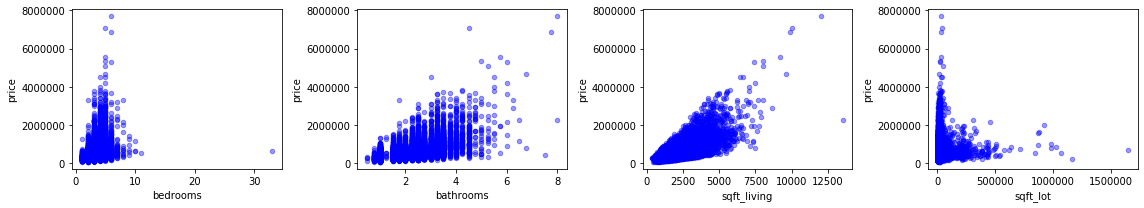

In [286]:
#checking plots for categorical columns
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_basic)[1:5], axes):
    df_basic.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
plt.tight_layout()

In [287]:
# something is weird with sqft lot, looks like there are a lot of outliers.

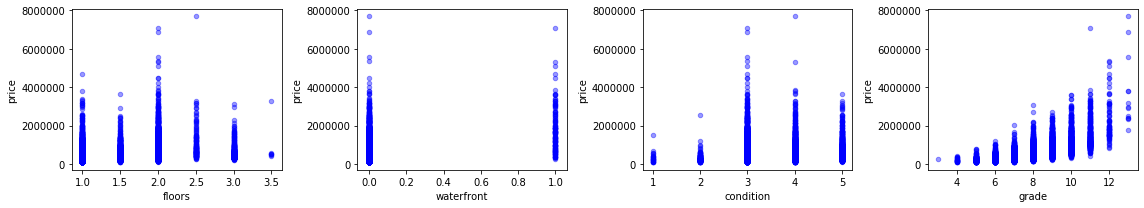

In [288]:
#checking plots for categorical columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_basic)[5:9], axes):
    df_basic.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
plt.tight_layout()

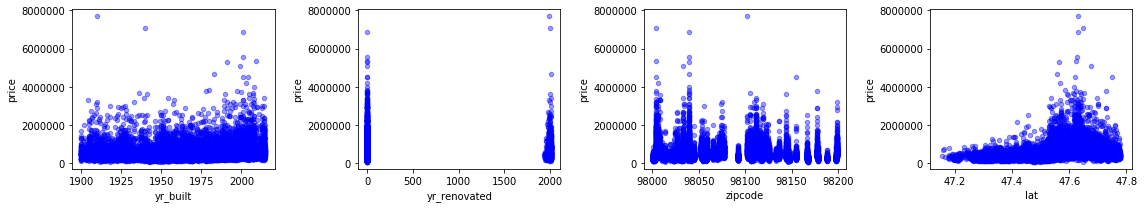

In [289]:
#checking plots for categorical columns
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_basic)[9:13], axes):
    df_basic.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
plt.tight_layout()

In [290]:
# yr renovated seems categorical but that's bc of the zero vals throwing off the graph incrementally. 
# zip code is categorical

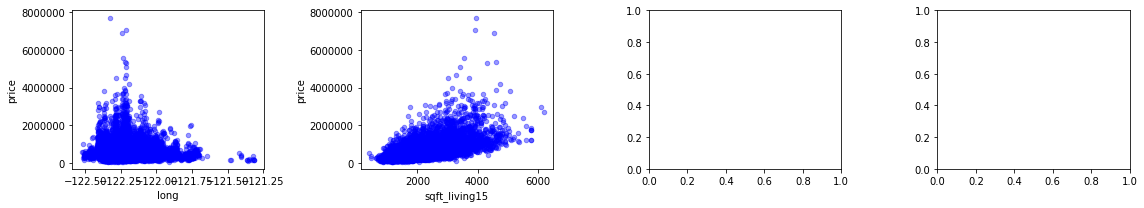

In [291]:
#checking plots for categorical columns

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(list(df_basic)[13:15], axes):
    df_basic.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
plt.tight_layout()

In [292]:
# sqft lot15 seems to have a lot of outliers. 

In [293]:
# categories - don’t log these - (use one hot c shortcut)
# 	waterfront - already in 1 and 0’s
# 	condition
# 	zipcode
# 	yr_built 
# 	yr renovated
	

# numerical
# 	bedrooms (need to filter)
# 	bathrooms (need to filter)
# 	floors
# 	grade (ordinal category so can keep numeric - need to scale though)
# 	soft living (need to filter)
# 	soft lot (need to filter)
# 	lat (maybe to filter, will check after first model)
# 	long (maybe to filter, will check after first model)
# 	sqft lot 15 (need to filter)

In [294]:
# list to look over:
# need to change list of categories, will try model before and after to compare.
# sqft lot, looks like there are a lot of outliers
# yr renovated seems categorical but that's bc of the zero vals throwing off the graph incrementally. 
# sqft lot15 seems to have a lot of outliers. 

### When converting to #'s, look for odd values (like many 0's), or strings that can't be converted.

In [295]:
# # year renovated has min val as zero, so we'll take a look at that
# df.plot(kind='scatter', x='yr_renovated', y='price', alpha=0.4, color='b');

In [296]:
# df.head(20)

In [297]:
# sorted(df['yr_renovated'].unique())

In [298]:
# df.loc[df['yr_renovated'] > 0]. describe()

In [299]:
# # we are going to put yr renovated into bins and then into categories
# df['yr_renovated'].describe() 

### Bin/convert yr_renovated to categorical.

In [300]:
# # First, create bins based on the values observed. 5 values will result in 4 bins
# bins = [-1, 1930, 1950 , 1970, 1990, 2010, 2020]

# # Use pd.cut()
# bins_yr_renovated = pd.cut(df['yr_renovated'], bins)

In [301]:
# # Using pd.cut() returns unordered categories. Transform this to ordered categories 
# bins_yr_renovated = bins_yr_renovated.cat.as_ordered()
# bins_yr_renovated.head()

In [302]:
# # Inspect the result
# bins_yr_renovated.value_counts().plot(kind='bar')

In [303]:
# # Replace the existing 'yr_renovated' column
# df['yr_renovated']=bins_yr_renovated

In [304]:
# df.head()

In [305]:
# # label encode yr renovated for regression
# # [(-1, 1930] < (1930, 1950] < (1950, 1970] < (1970, 1990] < (1990, 2010] < (2010, 2020]]
# # 0 = never renovated, 1=1930-50, 2=1950-70, 3=1970-90, 4=1990-2010, 5=2010-present

# df['yr_renovated'] = df['yr_renovated'].cat.codes

In [306]:
# # 0 = never renovated, 1=1930-50, 2=1950-70, 3=1970-90, 4=1990-2010, 5=2010-present
# df['yr_renovated'].value_counts()

In [307]:
# # notice the difference now compared to the previous renovated scatter. much more organized.
# df.plot(kind='scatter', x='yr_renovated', y='price', alpha=0.4, color='b');

## Check for multicollinearity.

### Create heatmap for collinearity check. 

(16, -0.5)

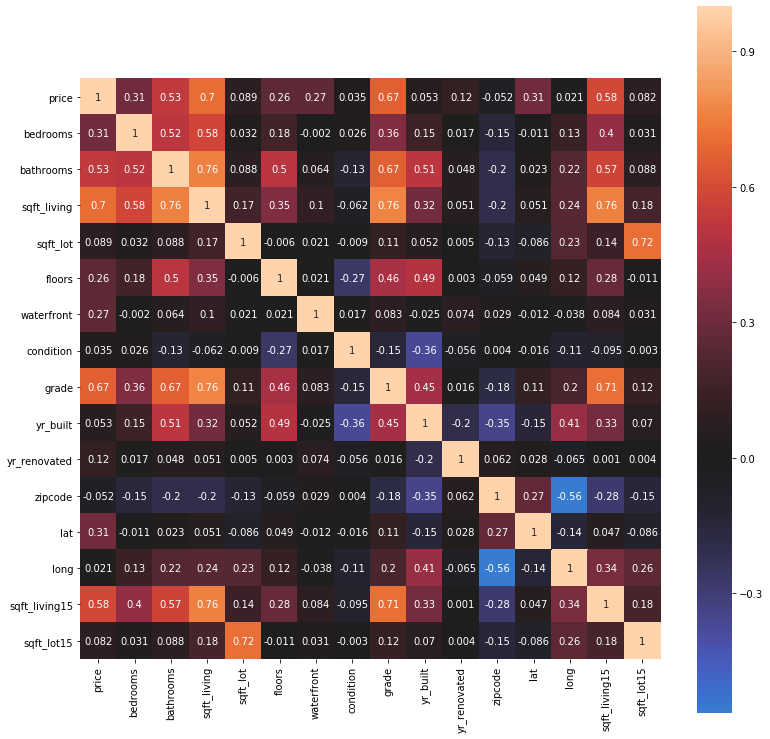

In [308]:
fig, axes = plt.subplots(figsize=(13,13))
sns.heatmap(df_basic.corr().round(3), center=0, square=True, ax=axes, annot=True);
axes.set_ylim(len(df_basic.corr()),-0.5,+0.5)

Sqft_living15 seems to have a bit of correlation with sqft_living and with grade and since those two predictors already are fairly correlated, I'll drop sqft_living15. 

## Drop cols affecting multicollinearity.

In [309]:
df_basic.drop('sqft_living15', axis=1, inplace=True)

In [310]:
df_basic.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503


# EXPLORE

In [311]:
# EXPLORE

#  Check distributions, outliers, etc**
#  Check scales, ranges (df.describe())
#  Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
# Can also do kernel density estimates
#  Use scatter plots to check for linearity and possible categorical variables (df.plot("x","y"))
# categoricals will look like vertical lines
#  Use pd.plotting.scatter_matrix(df) to visualize possible relationships
#  Check for linearity.

## Check distributions for normality.

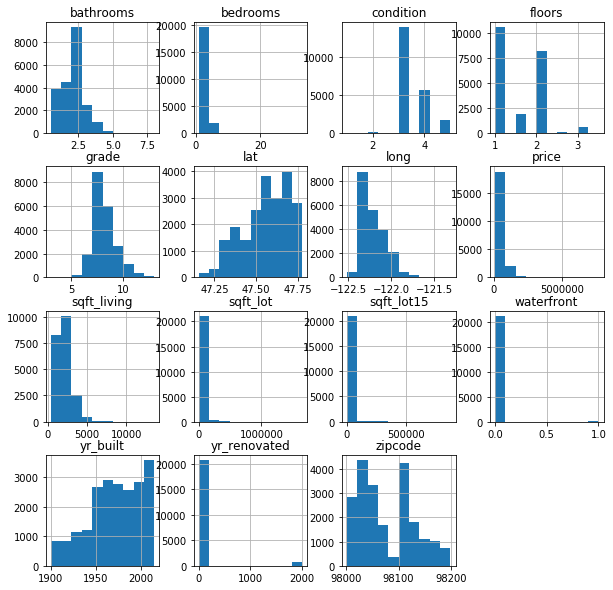

In [312]:
#  Normalize data (may want to do after some exploring)
df_basic.hist(figsize=(10,10));

In [313]:
# normalization thoughts:
# the only continuous variables I have are sqft living, sqft lot, living 15, lot 15. 
# The rest are basically categorical. Not sure if those need to be normalized. 

## Data transformations 1 - Z-scoring.

In [314]:
def find_outliers(col):
    """Use scipy to calcualte absoliute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series): a series/column from your DataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['bedrooms'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

### Normalize data by filtering outliers with z-scores.

In [316]:
df_outliers = pd.DataFrame()

cols_to_clean = ['bedrooms','bathrooms','sqft_living','sqft_lot','yr_built','sqft_lot15']

for col in cols_to_clean:
    df_outliers[col] = find_outliers(df_basic[col])

df_outliers.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,sqft_lot15
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [317]:
test_outs = df_outliers.any(axis=1)

In [318]:
np.sum(test_outs)

838

In [319]:
df_cleaned = df_basic.loc[test_outs==False]
df_cleaned.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
count,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000,20582.000
mean,519332.688,3.342,2.076,2017.215,10290.621,1.488,0.006,3.415,7.609,1970.639,67.885,98078.944,47.561,-122.218,9456.817
std,307890.682,0.861,0.711,803.745,12044.713,0.540,0.076,0.651,1.106,29.431,361.807,53.688,0.138,0.138,9421.736
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,1.000,3.000,1900.000,0.000,98001.000,47.156,-122.512,651.000
25%,319950.000,3.000,1.500,1410.000,5000.000,1.000,0.000,3.000,7.000,1951.000,0.000,98033.000,47.474,-122.331,5035.250
50%,445000.000,3.000,2.250,1890.000,7497.000,1.000,0.000,3.000,7.000,1974.000,0.000,98070.000,47.573,-122.237,7500.000
75%,630000.000,4.000,2.500,2500.000,10200.000,2.000,0.000,4.000,8.000,1996.000,0.000,98118.000,47.679,-122.132,9799.250
max,3640000.000,6.000,4.250,4830.000,137214.000,3.500,1.000,5.000,13.000,2015.000,2015.000,98199.000,47.778,-121.315,93825.000


In [320]:
df_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503


### Filter bedrooms.

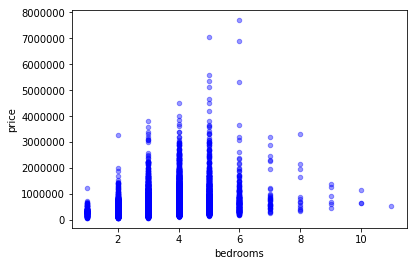

In [66]:
# outliers to filter - bedroom
df_basic.plot(kind='scatter', x='bedrooms', y='price', alpha=0.4, color='b');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580


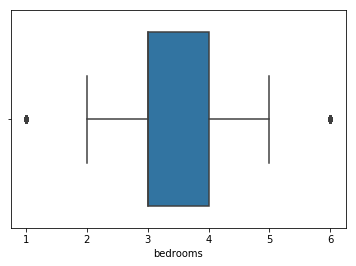

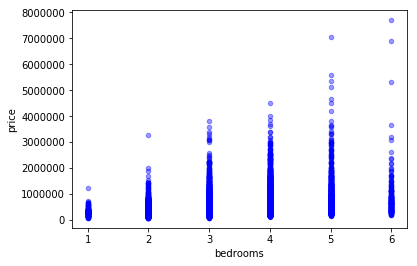

In [67]:
# bedroom zscore filter1
import scipy.stats as stats

z_score_bed = np.abs(stats.zscore(df_basic['bedrooms']))

df_basic['z_score_bedrooms'] = z_score_bed

df_filtered1 = df_basic.loc[df_basic['z_score_bedrooms'] < 3]

display(df_filtered1.head())
display(sns.boxplot(df_filtered1['bedrooms']))
display(df_filtered1.plot(kind='scatter', x='bedrooms', y='price', alpha=0.4, color='b'))

In [68]:
# so it looks like my bedrooms are filtered from 1 to 6 bedrooms now

### Filter bathrooms.

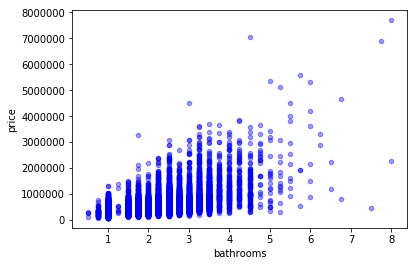

In [69]:
# outliers to filter - bathrooms
df_basic.plot(kind='scatter', x='bathrooms', y='price', alpha=0.4, color='b');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580,1.454958
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580,0.171160
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031,1.454958
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872,1.146831
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580,0.154064


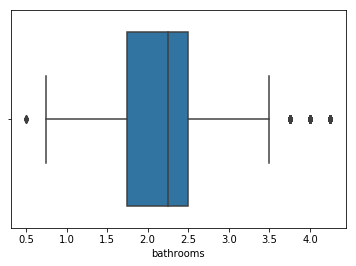

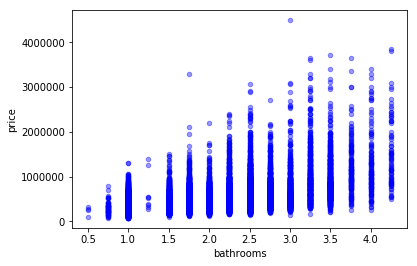

In [70]:
z_score_bath = np.abs(stats.zscore(df_basic['bathrooms']))

df_basic['z_score_bathrooms'] = z_score_bath

df_filtered1 = df_basic.loc[df_basic['z_score_bathrooms'] < 3]

display(df_filtered1.head())
display(sns.boxplot(df_filtered1['bathrooms']))
display(df_filtered1.plot(kind='scatter', x='bathrooms', y='price', alpha=0.4, color='b'))

In [71]:
# it looks like the z score filter put my bathroom range from .5 to 4.5. sweet. 

### Filter sqft living.

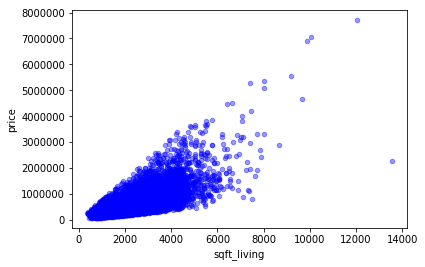

In [72]:
# outliers to filter - sqft living
df_basic.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='b');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms,z_score_sqft_living
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580,1.454958,0.982962
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580,0.171160,0.529902
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031,1.454958,1.429203
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872,1.146831,0.134017
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580,0.154064,0.438766


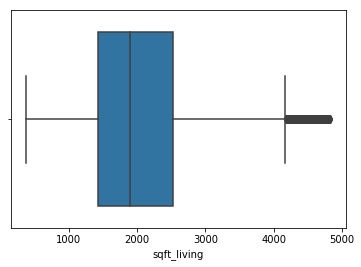

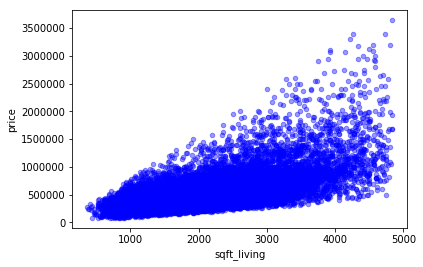

In [73]:
z_score_sqft_living = np.abs(stats.zscore(df_basic['sqft_living']))

df_basic['z_score_sqft_living'] = z_score_sqft_living

df_filtered1 = df_basic.loc[df_basic['z_score_sqft_living'] < 3]

display(df_filtered1.head())
display(sns.boxplot(df_filtered1['sqft_living']))
display(df_filtered1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='b'))

In [74]:
#it looks like the zscore filtered my sqft living from about 500 to 4800

### Filter sqft lot.

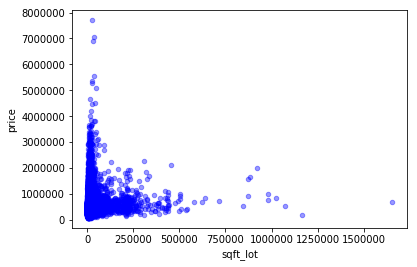

In [75]:
# outliers to filter - sqft lot
df_basic.plot(kind='scatter', x='sqft_lot', y='price', alpha=0.4, color='b');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms,z_score_sqft_living,z_score_sqft_lot
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580,1.454958,0.982962,0.228222
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580,0.171160,0.529902,0.189889
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031,1.454958,1.429203,0.123478
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872,1.146831,0.134017,0.243874
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580,0.154064,0.438766,0.169710


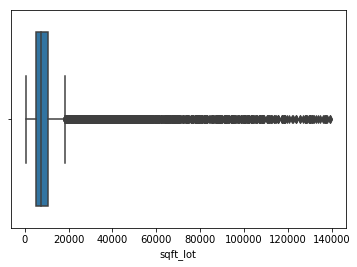

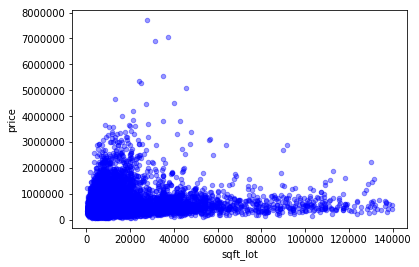

In [76]:
z_score_sqft_lot = np.abs(stats.zscore(df_basic['sqft_lot']))

df_basic['z_score_sqft_lot'] = z_score_sqft_lot

df_filtered1 = df_basic.loc[df_basic['z_score_sqft_lot'] < 3]

display(df_filtered1.head())
display(sns.boxplot(df_filtered1['sqft_lot']))
display(df_filtered1.plot(kind='scatter', x='sqft_lot', y='price', alpha=0.4, color='b'))

In [77]:
# it looks like the zscore filtered my sqft lot from 0 to 140000, way better than the outlier 1.6 million

### Filter sqft lot 15.

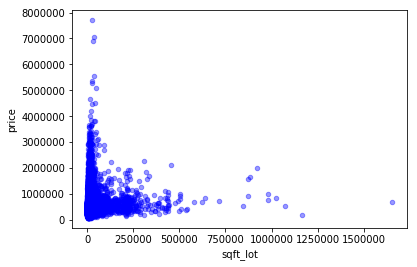

In [78]:
# outliers to filter - sqft lot
df_basic.plot(kind='scatter', x='sqft_lot', y='price', alpha=0.4, color='b');

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms,z_score_sqft_living,z_score_sqft_lot,z_score_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580,1.454958,0.982962,0.228222,0.260586
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580,0.171160,0.529902,0.189889,0.187849
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031,1.454958,1.429203,0.123478,0.172380
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872,1.146831,0.134017,0.243874,0.284356
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580,0.154064,0.438766,0.169710,0.192822


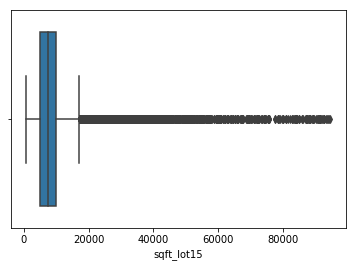

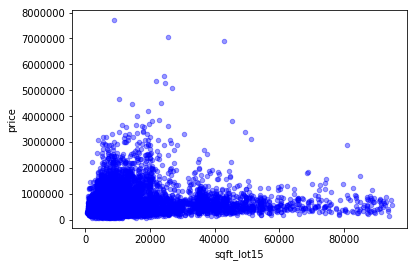

In [79]:
z_score_sqft_lot15 = np.abs(stats.zscore(df_basic['sqft_lot15']))

df_basic['z_score_sqft_lot15'] = z_score_sqft_lot15

df_filtered1 = df_basic.loc[df_basic['z_score_sqft_lot15'] < 3]

display(df_filtered1.head())
display(sns.boxplot(df_filtered1['sqft_lot15']))
display(df_filtered1.plot(kind='scatter', x='sqft_lot15', y='price', alpha=0.4, color='b'))

In [80]:
df_basic.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms,z_score_sqft_living,z_score_sqft_lot,z_score_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.412580,1.454958,0.982962,0.228222,0.260586
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.412580,0.171160,0.529902,0.189889,0.187849
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,1.520031,1.454958,1.429203,0.123478,0.172380
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.694872,1.146831,0.134017,0.243874,0.284356
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.412580,0.154064,0.438766,0.169710,0.192822


### Make filtered1 into copy to preserve basic. 

In [81]:
df_filtered1 = df_filtered1.copy()

In [82]:
df_basic.shape

(21420, 20)

In [83]:
df_filtered1.shape

(21059, 20)

### Drop unwanted zscore cols.

In [84]:
df_filtered1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'z_score_bedrooms',
       'z_score_bathrooms', 'z_score_sqft_living', 'z_score_sqft_lot',
       'z_score_sqft_lot15'],
      dtype='object')

In [85]:
df_filtered1.drop(['z_score_bedrooms',
       'z_score_bathrooms', 'z_score_sqft_living', 'z_score_sqft_lot',
       'z_score_sqft_lot15'], axis=1, inplace=True)

In [86]:
df_filtered1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503


### Check model normality after zscore filter outliers. 

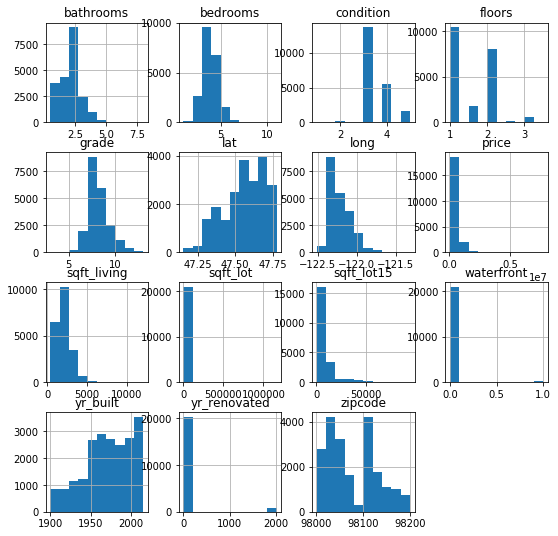

In [87]:
df_filtered1.hist(figsize=(9,9));

In [88]:
df_filtered1.describe().round(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
count,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000,21059.000
mean,539247.709,3.374,2.114,2071.459,11952.277,1.495,0.007,3.412,7.655,1970.898,69.097,98078.451,47.562,-122.217,9797.450
std,367916.675,0.904,0.766,905.123,26865.648,0.541,0.082,0.651,1.164,29.466,364.913,53.637,0.138,0.138,10169.465
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,1.000,3.000,1900.000,0.000,98001.000,47.156,-122.514,651.000
25%,320000.000,3.000,1.750,1420.000,5001.000,1.000,0.000,3.000,7.000,1951.000,0.000,98033.000,47.475,-122.329,5075.000
50%,450000.000,3.000,2.250,1910.000,7540.000,1.500,0.000,3.000,7.000,1975.000,0.000,98065.000,47.574,-122.234,7560.000
75%,643000.000,4.000,2.500,2540.000,10400.000,2.000,0.000,4.000,8.000,1997.000,0.000,98118.000,47.679,-122.129,9930.000
max,7700000.000,11.000,8.000,12050.000,1164794.000,3.500,1.000,5.000,13.000,2015.000,2015.000,98199.000,47.778,-121.315,94663.000


## Create model.

### Create model with data as is, not accounting for categorical data. 

First we create a model with variables as is, filtered but not accounting for some data needing to be categorized. Following up with a model below that will show the difference in output based on creating categorical variables where necessary. 

In [89]:
# create model using list of predictors by typing them all out.
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_filtered1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     3370.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:11:31   Log-Likelihood:            -2.8738e+05
No. Observations:               21059   AIC:                         5.748e+05
Df Residuals:                   21044   BIC:                         5.749e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9.775e+06   2.91e+06      3.354      0.001    4.06e+06    1.55e+07
bedrooms     -4.528e+04   2036.798    -22.232      0.000   -4.93e+04   -4.13e+04
bathrooms     4.098e+04   3320.377     12.341      0.000    3.45e+04    4.75e+04
sqft_living    197.5426      3.243     60.911      0.000     191.186     203.899
sqft_lot         0.0700      0.063      1.106      0.269      -0.054       0.194
floors        9257.4954   3337.068      2.774      0.006    2716.586    1.58e+04
waterfront    7.974e+05   1.75e+04     45.696      0.000    7.63e+05    8.32e+05
condition     2.655e+04   2406.896     11.029      0.000    2.18e+04    3.13e+04
grade         1.096e+05   2097.631     52.230      0.000    1.05e+05    1.14e+05
yr_built     -2865.4606     73.533    -38.968      0.000   -3009.591   -2721.331
yr_renovated    24.8156      4.079      6.084      0.000      16.821      32.810
zipcode       -558.2711     33.551    -16.639      0.000    -624.034    -492.508
lat           5.802e+05    1.1e+04     52.783      0.000    5.59e+05    6.02e+05
long         -1.824e+05   1.34e+04    -13.562      0.000   -2.09e+05   -1.56e+05
sqft_lot15      -1.3836      0.179     -7.727      0.000      -1.735      -1.033
==============================================================================
Omnibus:                    17243.944   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1462129.457
Skew:                           3.406   Prob(JB):                         0.00
Kurtosis:                      43.248   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# You'll notice that our R2 value is 0.692 which is eh.

# The P value for sqft_lot is at 0.269, well above the accepted 0.05 so that may have some issues with collinearity. 
# We can check the heat map on that one again. 

# Our skew is 3.4.
# Kurtosis is 43.2.
# Condition is 2.06^8

### Create model using numerical and categorical predictors.

In order to be sure our categorical variables are not being used in regression as values instead of labels, we will use stats to use a C() operator which will essentially one hot those specific variables

In [91]:
# create model using list of predictors by typing them all out. 
# removed sqft lot
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'C(waterfront)', 'C(condition)', 'grade', 'yr_built', 'yr_renovated',
       'C(zipcode)', 'lat', 'long', 'sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_filtered1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     976.9
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:11:32   Log-Likelihood:            -2.8300e+05
No. Observations:               21059   AIC:                         5.662e+05
Df Residuals:                   20974   BIC:                         5.669e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.559e+07   6.69e+06     -3.825      0.000   -3.87e+07   -1.25e+07
C(waterfront)[T.1.0]  8.501e+05   1.45e+04     58.722      0.000    8.22e+05    8.79e+05
C(condition)[T.2]     4.897e+04   3.42e+04      1.430      0.153   -1.82e+04    1.16e+05
C(condition)[T.3]     3.821e+04   3.16e+04      1.207      0.227   -2.38e+04       1e+05
C(condition)[T.4]     5.555e+04   3.16e+04      1.756      0.079   -6470.557    1.18e+05
C(condition)[T.5]     9.103e+04   3.18e+04      2.860      0.004    2.86e+04    1.53e+05
C(zipcode)[T.98002]   3.943e+04   1.51e+04      2.614      0.009    9860.537     6.9e+04
C(zipcode)[T.98003]  -2.599e+04   1.35e+04     -1.927      0.054   -5.24e+04     441.846
C(zipcode)[T.98004]   7.248e+05   2.51e+04     28.892      0.000    6.76e+05    7.74e+05
C(zipcode)[T.98005]   2.492e+05   2.67e+04      9.322      0.000    1.97e+05    3.02e+05
C(zipcode)[T.98006]    2.44e+05   2.19e+04     11.144      0.000    2.01e+05    2.87e+05
C(zipcode)[T.98007]   2.048e+05   2.76e+04      7.410      0.000    1.51e+05    2.59e+05
C(zipcode)[T.98008]   2.323e+05   2.63e+04      8.835      0.000    1.81e+05    2.84e+05
C(zipcode)[T.98010]   1.087e+05   2.38e+04      4.556      0.000    6.19e+04    1.55e+05
C(zipcode)[T.98011]   5.647e+04   3.43e+04      1.647      0.100   -1.07e+04    1.24e+05
C(zipcode)[T.98014]   1.321e+05   3.92e+04      3.365      0.001    5.51e+04    2.09e+05
C(zipcode)[T.98019]   7.667e+04   3.74e+04      2.048      0.041    3305.428     1.5e+05
C(zipcode)[T.98022]   7.817e+04   2.11e+04      3.699      0.000    3.67e+04     1.2e+05
C(zipcode)[T.98023]  -5.794e+04   1.25e+04     -4.651      0.000   -8.24e+04   -3.35e+04
C(zipcode)[T.98024]   1.797e+05   3.52e+04      5.109      0.000    1.11e+05    2.49e+05
C(zipcode)[T.98027]   1.555e+05   2.26e+04      6.886      0.000    1.11e+05       2e+05
C(zipcode)[T.98028]   4.888e+04   3.34e+04      1.466      0.143   -1.65e+04    1.14e+05
C(zipcode)[T.98029]   2.062e+05   2.58e+04      8.004      0.000    1.56e+05    2.57e+05
C(zipcode)[T.98030]   7717.0453   1.49e+04      0.517      0.605   -2.15e+04     3.7e+04
C(zipcode)[T.98031]   8024.4424   1.56e+04      0.516      0.606   -2.25e+04    3.85e+04
C(zipcode)[T.98032]  -1.603e+04    1.8e+04     -0.892      0.372   -5.12e+04    1.92e+04
C(zipcode)[T.98033]   3.193e+05   2.86e+04     11.170      0.000    2.63e+05    3.75e+05
C(zipcode)[T.98034]   1.474e+05   3.07e+04      4.802      0.000    8.72e+04    2.08e+05
C(zipcode)[T.98038]   6.389e+04    1.7e+04      3.756      0.000    3.06e+04    9.72e+04
C(zipcode)[T.98039]   1.272e+06   3.36e+04     37.811      0.000    1.21e+06    1.34e+06
C(zipcode)[T.98040]   4.757e+05   2.21e+04     21.559      0.000    4.32e+05    5.19e+05
C(zipcode)[T.98042]   2.273e+04   1.44e+04      1.580    

In [92]:
# In this model there is an R2 value of 0.804. Much better fit. 

# The P value for 'condition' variable 2 is 0.106
# The P value for 'condition' variable 3 is 0.131
# This could be because there were so few houses in that codition to draw info from. 

# The P values for 'yr_built' from 1902-1928, 1930-1932, 1934-1945, 1949-1950 all are well over 0.05. 
# The P values for 'yr_renovated' from 1934-1955, 1957-1962, 1964-1969, 1971-1984, 1988-1989, 1991-1993, 
# 1996-1998, 2000, 2004, 2006-2007, 2011-2012, and 2015 are all well over 0.05.
# This could be because there were little to no houses renovated during those years. 

# The P values in 'zipcode' 98003, 98011, 98028, 98030-98032, 98042, 98055, 98058, 98092, 
# 98148, 98155, 98166, 98168, 98178, 98188, 98198 all are well over 0.05. 
# This could be because of lack of data from housing in those zipcodes. 

# Notice the P value for sqft_lot that was problematic before is now fine. 

# Our skew is up to 3.8, from 3.4 in the last model. Interesting. 
# Kurtosis is up to 58.3 from 43.2 in the last model.
# The condition number is down to 1.82^8 from 2.06^8 in the last model. 

From the results of both models, there was a clear improvement overall in ability to predict housing prices. My next thoughts would be to drop some of the columns causing multicollinearity in addition to scaling some of the data units to match up better. 

## Data transformations 2 - feature scaling.

### Normalize with min max feature scaling to manage the difference in magnitude. 

We are going to look at features that have units of measure that are very different from most of the other variables and look at scaling them to match better for a better fit model. One of the ways we can do this is by using min max scaling to adjust the magnitude of the units down to range 0-1.

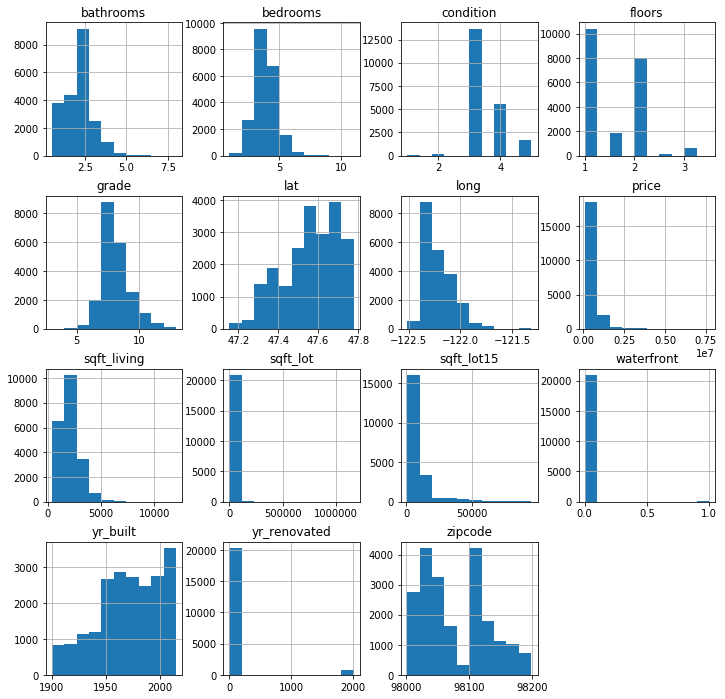

In [93]:
# Take a look at the histogram to show the difference in magnitude of our numerical features. 
df_filtered1.hist(figsize=(12,12));

In [94]:
# The features we'll want to scale will be:
# sqft living, sqft lot, lat, long, sqft lot 15

In [95]:
# this loops through the cols needing to be scaled 
# applies equation for min max scaling and adds new col to dataframe

scale = ['sqft_living', 'sqft_lot', 'lat', 'long', 'sqft_lot15']
for col in scale:
    x = df_filtered1[col]
    scaled_x = (x - min(x)) / (max(x) - min(x))
    df_filtered1['scaled_' + col] = scaled_x

df_filtered1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,scaled_sqft_living,scaled_sqft_lot,scaled_lat,scaled_long,scaled_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,5650,0.069349,0.004406,0.571498,0.214345,0.053174
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,7639,0.188356,0.005774,0.908959,0.162636,0.074331
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,8062,0.034247,0.008142,0.936143,0.234362,0.078830
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,5000,0.136130,0.003848,0.586939,0.100917,0.046260
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,7503,0.112158,0.006493,0.741354,0.391159,0.072884


The scale columns are added to the existing dataframe and can then be applied into the model the same as the previous columns, just in place of the originals to show the difference in model performance. 

### Check hist to show new scaled data. 

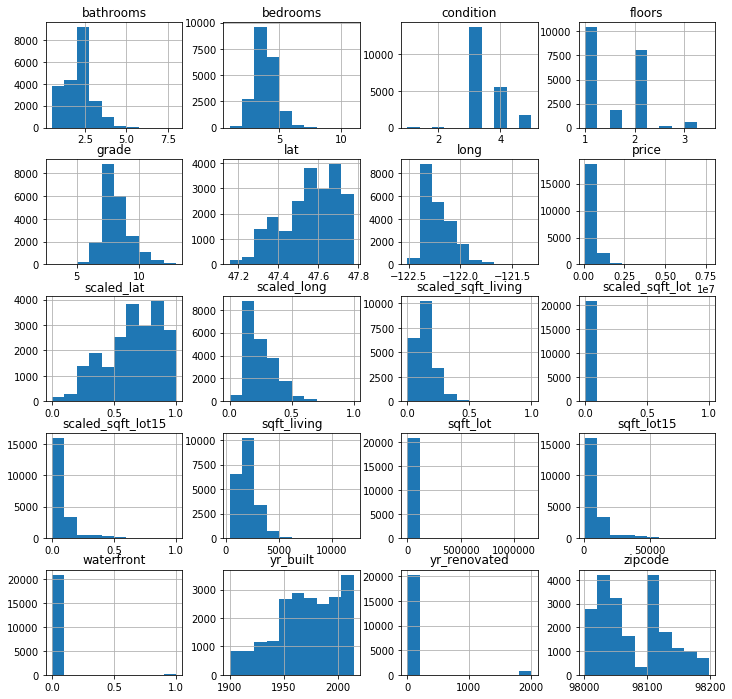

In [96]:
df_filtered1.hist(figsize=(12,12));

# MODEL

## Create model. 

Next we create an updated model that has the scaled numerical features with similar magnitudes to rest of the data in place of previous ones. The features we scaled were sqft_living, sqft_lot, lat, long, sqft_lot15.

In [97]:
df_filtered1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'scaled_sqft_living',
       'scaled_sqft_lot', 'scaled_lat', 'scaled_long', 'scaled_sqft_lot15'],
      dtype='object')

In [98]:
# create model using list of predictors by typing them all out. 
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'scaled_sqft_living', 'floors',
       'C(waterfront)', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'C(zipcode)', 'scaled_lat', 'scaled_long', 'scaled_sqft_lot15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_filtered1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:11:38   Log-Likelihood:            -2.8301e+05
No. Observations:               21059   AIC:                         5.662e+05
Df Residuals:                   20977   BIC:                         5.668e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.658e+06   1.31e+05     12.681      0.000     1.4e+06    1.91e+06
C(waterfront)[T.1.0]  8.503e+05   1.45e+04     58.722      0.000    8.22e+05    8.79e+05
C(zipcode)[T.98002]   3.822e+04   1.51e+04      2.533      0.011    8647.970    6.78e+04
C(zipcode)[T.98003]  -2.691e+04   1.35e+04     -1.996      0.046   -5.33e+04    -479.706
C(zipcode)[T.98004]    7.23e+05   2.51e+04     28.828      0.000    6.74e+05    7.72e+05
C(zipcode)[T.98005]   2.477e+05   2.67e+04      9.267      0.000    1.95e+05       3e+05
C(zipcode)[T.98006]   2.429e+05   2.19e+04     11.097      0.000       2e+05    2.86e+05
C(zipcode)[T.98007]   2.023e+05   2.76e+04      7.322      0.000    1.48e+05    2.56e+05
C(zipcode)[T.98008]   2.302e+05   2.63e+04      8.756      0.000    1.79e+05    2.82e+05
C(zipcode)[T.98010]   1.081e+05   2.39e+04      4.532      0.000    6.14e+04    1.55e+05
C(zipcode)[T.98011]   5.505e+04   3.43e+04      1.605      0.108   -1.22e+04    1.22e+05
C(zipcode)[T.98014]   1.309e+05   3.93e+04      3.335      0.001    5.39e+04    2.08e+05
C(zipcode)[T.98019]   7.568e+04   3.74e+04      2.022      0.043    2310.206    1.49e+05
C(zipcode)[T.98022]    7.87e+04   2.11e+04      3.723      0.000    3.73e+04     1.2e+05
C(zipcode)[T.98023]  -5.854e+04   1.25e+04     -4.699      0.000    -8.3e+04   -3.41e+04
C(zipcode)[T.98024]   1.789e+05   3.52e+04      5.086      0.000     1.1e+05    2.48e+05
C(zipcode)[T.98027]   1.544e+05   2.26e+04      6.839      0.000     1.1e+05    1.99e+05
C(zipcode)[T.98028]   4.732e+04   3.34e+04      1.419      0.156    -1.8e+04    1.13e+05
C(zipcode)[T.98029]   2.052e+05   2.58e+04      7.962      0.000    1.55e+05    2.56e+05
C(zipcode)[T.98030]   6919.6218   1.49e+04      0.464      0.643   -2.23e+04    3.62e+04
C(zipcode)[T.98031]   6762.8304   1.56e+04      0.435      0.664   -2.37e+04    3.72e+04
C(zipcode)[T.98032]  -1.764e+04    1.8e+04     -0.982      0.326   -5.28e+04    1.76e+04
C(zipcode)[T.98033]   3.181e+05   2.86e+04     11.128      0.000    2.62e+05    3.74e+05
C(zipcode)[T.98034]   1.459e+05   3.07e+04      4.754      0.000    8.58e+04    2.06e+05
C(zipcode)[T.98038]    6.35e+04    1.7e+04      3.733      0.000    3.02e+04    9.69e+04
C(zipcode)[T.98039]    1.27e+06   3.36e+04     37.751      0.000     1.2e+06    1.34e+06
C(zipcode)[T.98040]   4.745e+05   2.21e+04     21.516      0.000    4.31e+05    5.18e+05
C(zipcode)[T.98042]   2.253e+04   1.44e+04      1.566      0.117   -5675.445    5.07e+04
C(zipcode)[T.98045]   1.663e+05   3.19e+04      5.210      0.000    1.04e+05    2.29e+05
C(zipcode)[T.98052]   1.814e+05   2.92e+04      6.208      0.000    1.24e+05    2.39e+05
C(zipcode)[T.98053]   1.783e+05   3.15e+04      5.661      0.000    1.17e+05     2.4e+05
C(zipcode)[T.98055]   2.971e+04   1.75e+04      1.702    

In [99]:
# The R2 value is still at 0.804 so that's good. 
# The bedrooms coeff is negative so we may need to scale that as well to get the magnitude of units closer. 
# The scaled_sqft_living coeff went from 194.6 to 2.273^6
# The scaled_sqft_lot coeff went from 0.1898 to 2.209^5
# The scaled_lat coeff went from 1.555e+05 to 9.67e+04
# The scaled_long coeff went from -1.922e+05 to -2.304e+05
# The sqft_lot15 coeff went from 0.4128 to 3.881e+04

# Our skew is still 3.8. 
# Kurtosis is still 58.3.
# The condition number is down to 1.56^3 from 1.82^8 in the last model. 

### Look at heat map again with new numbers. 

(20, -0.5)

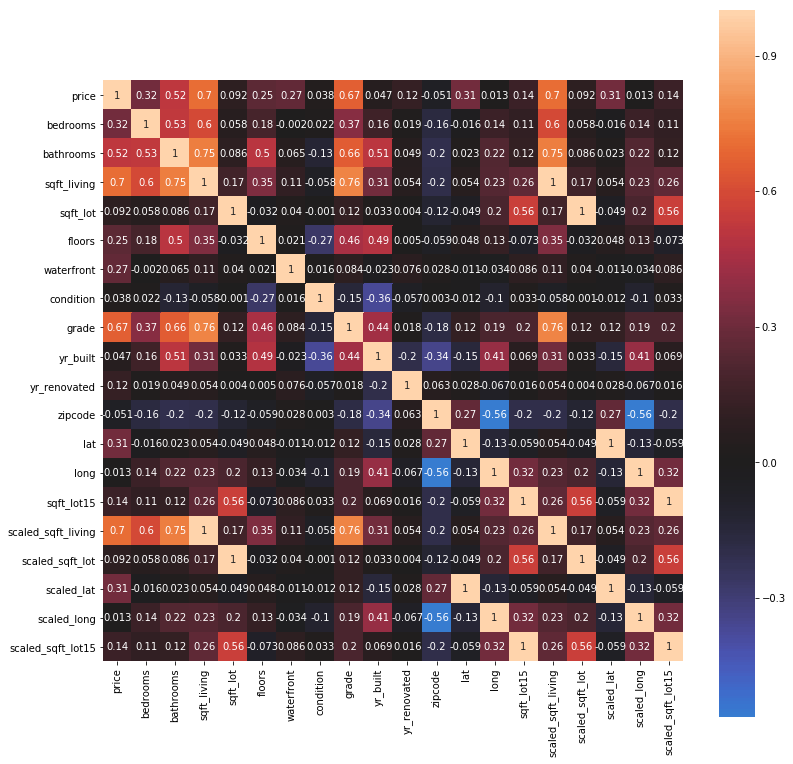

In [100]:
fig, axes = plt.subplots(figsize=(13,13))
sns.heatmap(df_filtered1.corr().round(3), center=0, square=True, ax=axes, annot=True);
axes.set_ylim(len(df_filtered1.corr()),-0.5,+0.5)

In [101]:
# it seems like grade is somewhat correlated so maybe I could drop that column, 
# or I can try scaling it to see if that changes anything. 

### add one more version of the model to confirm outliers have been removed.

In [102]:
# def find_outliers(col):
#     """Use scipy to calcualte absoliute Z-scores 
#     and return boolean series where True indicates it is an outlier
#     Args:
#         col (Series): a series/column from your DataFrame
#     Returns:
#         idx_outliers (Series): series of  True/False for each row in col
        
#     Ex:
#     >> idx_outs = find_outliers(df['bedrooms'])
#     >> df_clean = df.loc[idx_outs==False]"""
#     from scipy import stats
#     z = np.abs(stats.zscore(col))
#     idx_outliers = np.where(z>3,True,False)
#     return pd.Series(idx_outliers,index=col.index)
# ​
# idx = find_outliers(df['price'])
# idx
# df = df.loc[idx==False]

### New model with only specific coeffs to compare.

In [103]:
# create model using best coeffs list of predictors by typing them all out. 
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'scaled_sqft_living', 'scaled_sqft_lot',
        'C(condition)', 'grade',]
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = smf.ols(formula=formula, data=df_filtered1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     2965.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:11:41   Log-Likelihood:            -2.9114e+05
No. Observations:               21059   AIC:                         5.823e+05
Df Residuals:                   21049   BIC:                         5.824e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.249e+05   4.82e+04     -6.742      0.000   -4.19e+05    -2.3e+05
C(condition)[T.2]    -8.4e+04   5.02e+04     -1.674      0.094   -1.82e+05    1.44e+04
C(condition)[T.3]  -1.357e+05   4.63e+04     -2.929      0.003   -2.27e+05   -4.49e+04
C(condition)[T.4]  -6.965e+04   4.64e+04     -1.502      0.133   -1.61e+05    2.12e+04
C(condition)[T.5]   1.597e+04   4.66e+04      0.342      0.732   -7.54e+04    1.07e+05
bedrooms           -5.142e+04   2415.722    -21.285      0.000   -5.62e+04   -4.67e+04
bathrooms          -1.714e+04   3530.467     -4.855      0.000   -2.41e+04   -1.02e+04
scaled_sqft_living  2.707e+06   4.35e+04     62.265      0.000    2.62e+06    2.79e+06
scaled_sqft_lot    -5.415e+05   7.45e+04     -7.270      0.000   -6.88e+05   -3.96e+05
grade               1.033e+05   2364.246     43.680      0.000    9.86e+04    1.08e+05
==============================================================================
Omnibus:                    15984.277   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882814.966
Skew:                           3.151   Prob(JB):                         0.00
Kurtosis:                      34.087   Cond. No.                         544.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

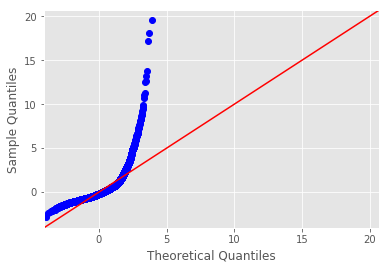

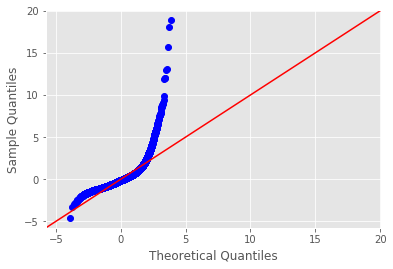

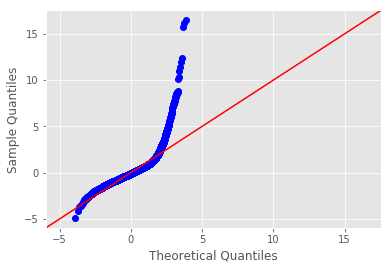

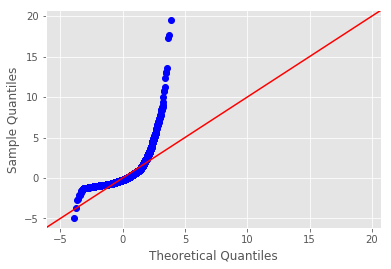

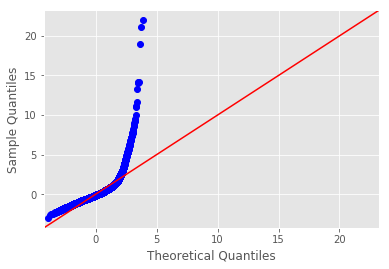

In [104]:
# that whole model is messed up now. Pulling up qq plots.

plt.style.use('ggplot')

f = 'price~bedrooms'
f2 = 'price~bathrooms'
f3 = 'price~scaled_sqft_living'
f4 = 'price~scaled_sqft_lot'
# f5 = 'price~C(condition)'
f6 = 'price~grade'
model = smf.ols(formula=f, data=df_filtered1).fit()
model2 = smf.ols(formula=f2, data=df_filtered1).fit()
model3 = smf.ols(formula=f3, data=df_filtered1).fit()
model4 = smf.ols(formula=f4, data=df_filtered1).fit()
# model5 = smf.ols(formula=f5, data=data).fit()
model6 = smf.ols(formula=f6, data=df_filtered1).fit()


resid1 = model.resid
resid2 = model2.resid
resid3 = model3.resid
resid4 = model4.resid
# resid5 = model5.resid
resid6 = model6.resid

fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid3, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid4, dist=stats.norm, line='45', fit=True)
# fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)

In [105]:
# all of my variables are messed up and have outliers falling way off of the line. No clue how to fix this. Filter the price ?

# iNTERPRET

In [106]:
df_filtered1.shape

(21059, 20)

In [107]:
df_filtered1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,scaled_sqft_living,scaled_sqft_lot,scaled_lat,scaled_long,scaled_sqft_lot15
count,2.105900e+04,21059.000000,21059.000000,21059.000000,2.105900e+04,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000,21059.000000
mean,5.392477e+05,3.373854,2.114072,2071.458521,1.195228e+04,1.495133,0.006790,3.412033,7.654969,1970.897621,69.097251,98078.450639,47.561666,-122.216805,9797.450401,0.145673,0.009819,0.652672,0.247869,0.097290
std,3.679167e+05,0.903651,0.765593,905.122712,2.686565e+04,0.540648,0.082126,0.650613,1.164359,29.465601,364.913382,53.636967,0.137634,0.138271,10169.465078,0.077493,0.023075,0.221384,0.115322,0.108172
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.474700,-122.329000,5075.000000,0.089897,0.003849,0.512788,0.154295,0.047058
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.540000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.573600,-122.234000,7560.000000,0.131849,0.006030,0.671867,0.233528,0.073491
75%,6.430000e+05,4.000000,2.500000,2540.000000,1.040000e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678550,-122.129000,9930.000000,0.185788,0.008486,0.840679,0.321101,0.098700
max,7.700000e+06,11.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,94663.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
df_basic.shape

(21420, 20)

In [109]:
df_basic.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,z_score_bedrooms,z_score_bathrooms,z_score_sqft_living,z_score_sqft_lot,z_score_sqft_lot15
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,3.410784,7.662792,1971.092997,68.956723,98077.87437,47.560197,-122.213784,12775.718161,0.810073,0.798798,0.760465,0.334145,0.370691
std,3.679311e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.650035,1.171971,29.387141,364.552298,53.47748,0.138589,0.140791,27345.621867,0.586343,0.601613,0.649394,0.942544,0.928778
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,651.000000,0.412580,0.154064,0.002032,0.000097,0.000120
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,5100.000000,0.412580,0.479287,0.312224,0.143946,0.146488
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,7620.000000,0.694872,0.496383,0.645561,0.199749,0.218531
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,10086.250000,0.694872,1.454958,1.037382,0.263571,0.307340
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,871200.000000,8.447032,7.651302,12.469558,39.398935,31.392386


### bedroom vs bathroom

In [110]:
# it looks like my data was filtered above but was never removed from the df so I've been running my model 
# with all the outliers from original df. 

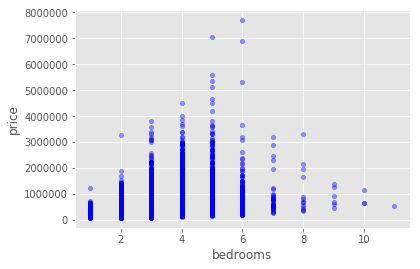

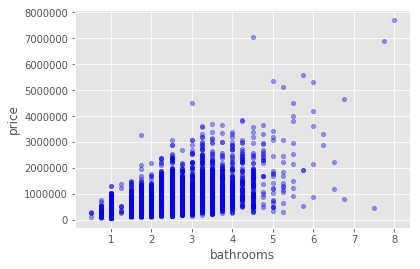

In [111]:
# bedrooms	-32320
# bathrooms	21680
# according to my previous model the bathrooms have a bigger coeff and more positive relationship with price.
# A "unit" increase in bedrooms is associated with a -32320 "unit" increase in price.
# A "unit" increase in bathrooms is associated with a 21680 "unit" increase in price.
df_filtered1.plot(kind='scatter', x='bedrooms', y='price', alpha=0.4, color='b')
df_filtered1.plot(kind='scatter', x='bathrooms', y='price', alpha=0.4, color='b');

### sqft living vs sqft lot

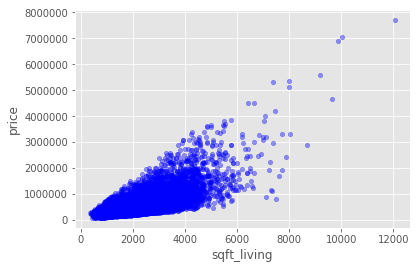

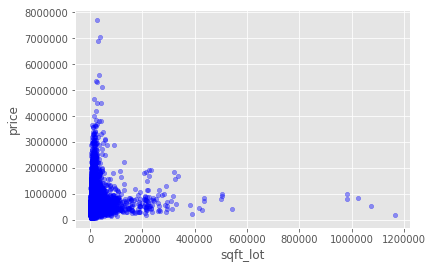

In [112]:
# scaled_sqft_living	2273000
# scaled_sqft_lot	220900
# according to model my sqft living area is more significant
# A "unit" increase in sqft living is associated with a 194.6 "unit" increase in price.
# A "unit" increase in sqft lot is associated with a 0.1898 "unit" increase in price.

# sqft_living	194.6130
# sqft_lot	0.1898

df_filtered1.plot(kind='scatter', x='sqft_living', y='price', alpha=0.4, color='b')
df_filtered1.plot(kind='scatter', x='sqft_lot', y='price', alpha=0.4, color='b');

### condition vs grade

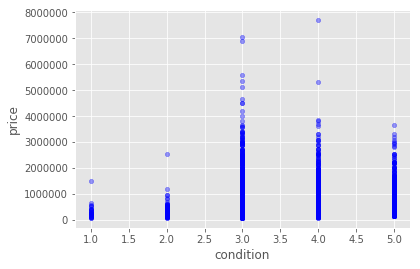

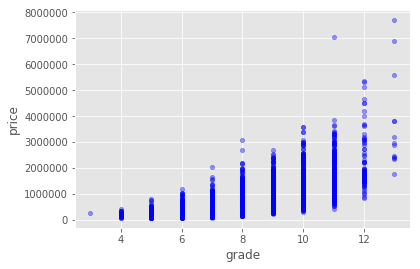

In [113]:
# grade	75270
# C(condition)[T.2]	54930
# C(condition)[T.3]	47460
# C(condition)[T.4]	69170
# C(condition)[T.5]	103100
# grade is more significant unless your house is condition level 5.
# A "unit" increase in grade is associated with a 75270 "unit" increase in price.
# A "unit" increase in condition rating 5 is associated with a 103100 "unit" increase in price.

df_filtered1.plot(kind='scatter', x='condition', y='price', alpha=0.4, color='b')
df_filtered1.plot(kind='scatter', x='grade', y='price', alpha=0.4, color='b');

# CONCLUSIONS & RECOMMENDATIONS

> Best predictors for house pricing:
    - # of bathrooms (recommend adding a bathroom to your home)
    - square footage of living area (recommend finding most sqft you can afford)
    - grade of house based on King County grading system (look for best grade rating for quality. higher grade 
        is also usually paired with higher sqft area too.)
